In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 
  
# metadata 
print(spambase.metadata) 
  
# variable information 
print(spambase.variables) 

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [5]:
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [6]:
y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
4596,0
4597,0
4598,0
4599,0


In [7]:
print(X.columns)

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


# Analyse du Dataset

In [23]:
print("Shape du dataset :", X.shape)
print("\nTypes de colonnes :")
print(X.dtypes)
print("\nStatistiques descriptives :")
print(X.describe())

Shape du dataset : (4601, 57)

Types de colonnes :
word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64

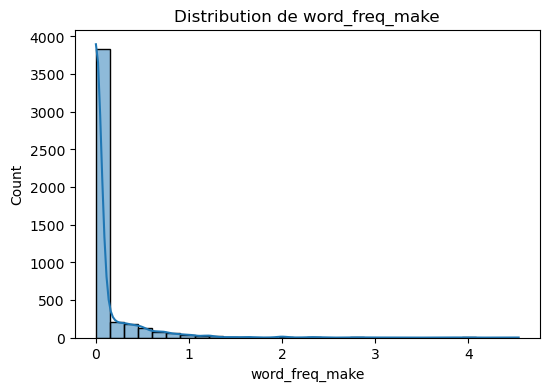

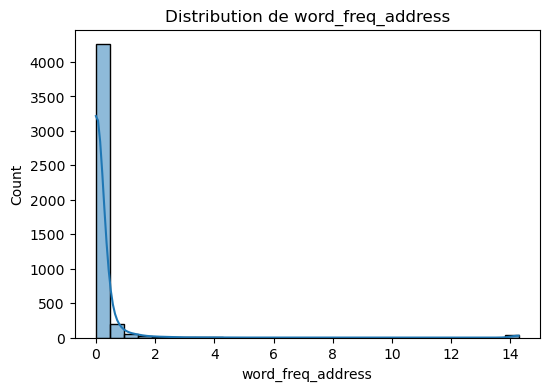

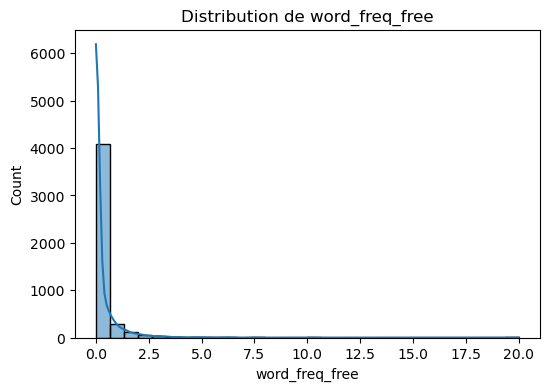

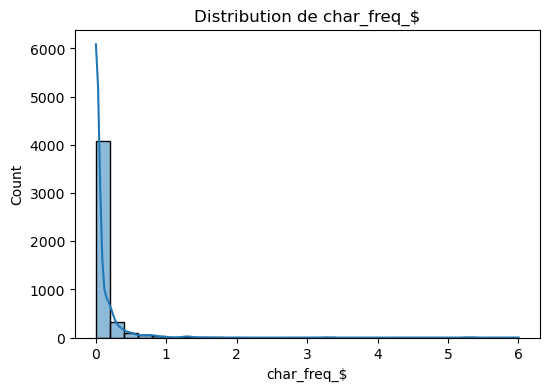

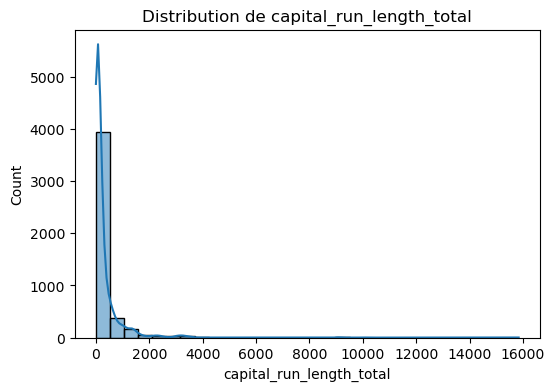

In [25]:
features_to_plot = [
    "word_freq_make", "word_freq_address", "word_freq_free",
    "char_freq_$", "capital_run_length_total"
]

for col in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.histplot(X[col], bins=30, kde=True)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

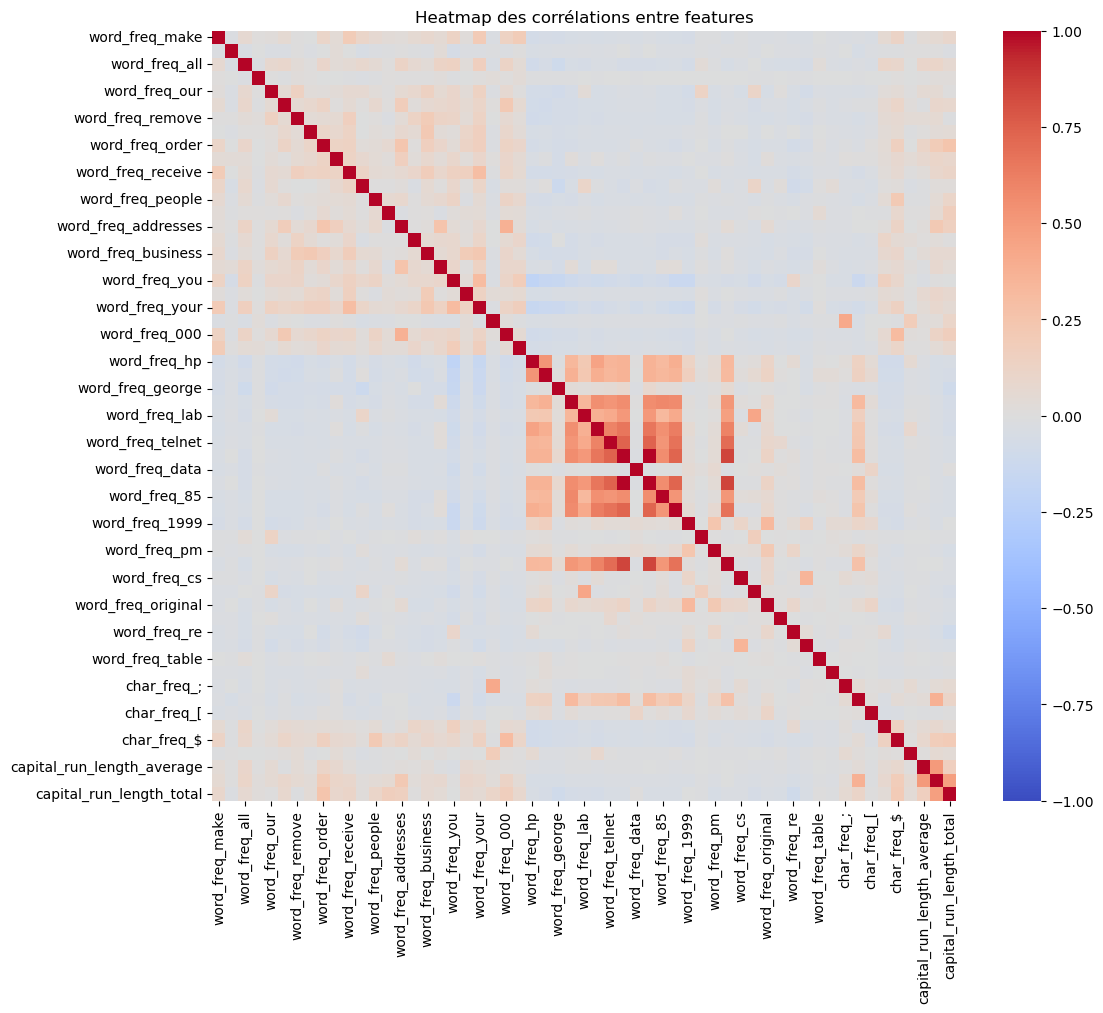

In [26]:
plt.figure(figsize=(12,10))
corr = X.corr()
sns.heatmap(corr, cmap="coolwarm", center=0, vmax=1, vmin=-1)
plt.title("Heatmap des corrélations entre features")
plt.show()

# 1er Test

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [9]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_scaled_train, X_scaled_test, y_train_s, y_test_s = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

y_train_s = y_train_s.values.ravel()
y_test_s = y_test_s.values.ravel()

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(solver="saga",max_iter=1000000),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(kernel="linear",max_iter=5000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [12]:
results = {}

for name, model in models.items():
    if name=="Logistic Regression" or name=="SVM" :
        model.fit(X_scaled_train,y_train_s)
        y_pred = model.predict(X_scaled_test)
        acc = accuracy_score(y_test_s, y_pred)
        results[name] = acc
        print(f"\n{name}")
        print(classification_report(y_test_s, y_pred))
    else : 
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc
        print(f"\n{name}")
        print(classification_report(y_test, y_pred))


Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       531
           1       0.74      0.89      0.81       390

    accuracy                           0.82       921
   macro avg       0.82      0.83      0.82       921
weighted avg       0.83      0.82      0.82       921


Naive Bayes
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       837
           1       0.72      0.68      0.70       544

    accuracy                           0.77      1381
   macro avg       0.76      0.75      0.76      1381
weighted avg       0.77      0.77      0.77      1381


SVM
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       531
           1       0.93      0.88      0.91       390

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92  

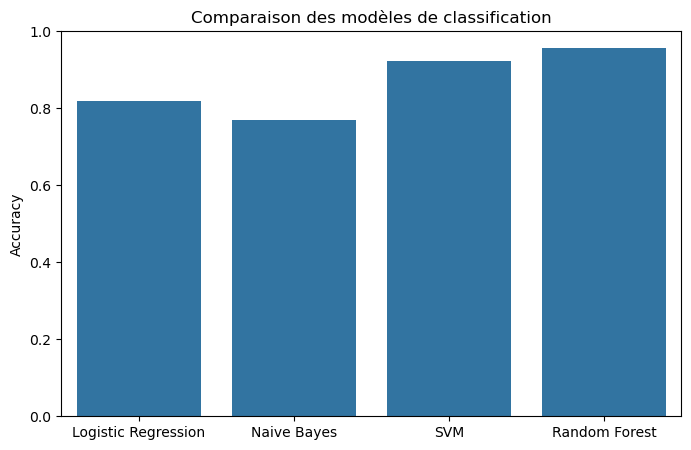

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Accuracy")
plt.title("Comparaison des modèles de classification")
plt.ylim(0, 1)
plt.show()

In [14]:
best_model = max(results, key=results.get)
print(f"\n✅ Le meilleur modèle est : {best_model} avec une précision de {results[best_model]:.2f}")


✅ Le meilleur modèle est : Random Forest avec une précision de 0.96


# Deuxième Test

In [27]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [16]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [19]:
models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=5000))
    ]),
    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LinearSVC(max_iter=5000))
    ]),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [32]:
scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]

results = {}

for name, model in models.items():
    cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring)
    results[name] = {metric: np.mean(cv_results[f"test_{metric}"]) for metric in scoring}

# Affichage
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values("f1_macro", ascending=False)
print(results_df)

                     accuracy  precision_macro  recall_macro  f1_macro
Random Forest        0.953705         0.953926      0.948964  0.951253
SVM                  0.924801         0.924393      0.917875  0.920689
Logistic Regression  0.924584         0.924220      0.917599  0.920446
Naive Bayes          0.791565         0.782579      0.779313  0.780673


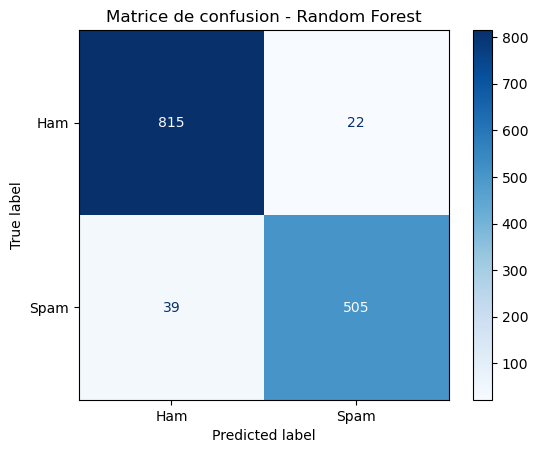

In [33]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ham", "Spam"])
disp.plot(cmap="Blues")
plt.title("Matrice de confusion - Random Forest")
plt.show()